# Distributions

/var/folders/bb/2qsf8cm95jg05zrms2_8m2qr0000gn/T/ipykernel_60795/1350136147.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


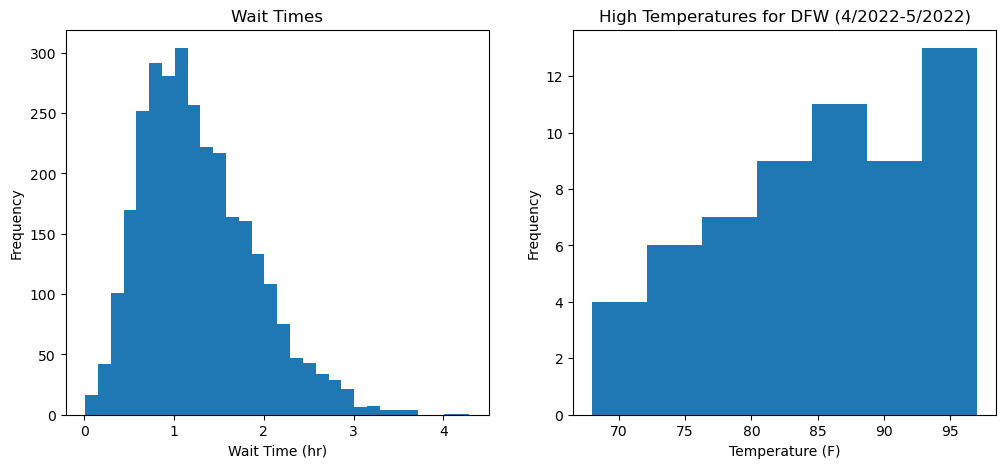

In [1]:
from scipy.stats import skewnorm
import matplotlib.pyplot as plt
a = 4
x = skewnorm.rvs(a, size=3000) + 0.5
x = x[x > 0]
dfw_highs = [
    85, 87, 75, 88, 80, 86, 90, 94, 93, 92, 90, 92, 94,
    93, 97, 90, 95, 96, 96, 95, 92, 70, 79, 73, 88, 92,
    94, 93, 95, 76, 78, 86, 81, 95, 77, 71, 69, 88, 86,
    89, 84, 82, 77, 84, 81, 79, 75, 75, 91, 86, 86, 84,
    82, 68, 75, 78, 82, 83, 85]
fig, ax = plt.subplots(1,2, figsize=(12, 5))
ax[0].hist(x, bins=30)
ax[0].set_xlabel('Wait Time (hr)')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Wait Times');
ax[1].hist(dfw_highs, bins=7)
ax[1].set_title('High Temperatures for DFW (4/2022-5/2022)')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Temperature (F)')
fig.show()

In [3]:
import numpy as np
from scipy import stats
values = [85, 99, 70, 71, 86, 88, 94]
quartiles = np.quantile(values, [0.25, 0.5, 0.75],
    method="closest_observation")
print(f"The quartiles are Q1: {quartiles[0]},Q2: {quartiles[1]}, Q3: {quartiles[2]}")
iqr = stats.iqr(values,interpolation='closest_observation')
print(f"The interquartile range is {iqr}")
# The quartiles are Q1: 71, Q2: 85, Q3: 88
# The interquartile range is 17

The quartiles are Q1: 71,Q2: 85, Q3: 88
The interquartile range is 17


In [5]:
from scipy.stats import skewnorm, norm
from scipy.stats import skew as skew_calc
# generate data
skew_left = -skewnorm.rvs(10, size=3000) + 4
skew_right = skewnorm.rvs(10, size=3000) + 3
symmetric = norm.rvs(10, size=3000)
# calculate skewness
skew_left_value = skew_calc(skew_left)
skew_right_value = skew_calc(skew_right)
symmetric_value = skew_calc(symmetric)
# Output may vary some due to randomness of generated data
print(f"The skewness value of this left skewed distribution is {skew_left_value:.3f}")
print(f"The skewness value of this right skewed distribution is {skew_right_value:.3f}")
print(f"The skewness value of this symmetric distributionis {symmetric_value:.3f}")

The skewness value of this left skewed distribution is -0.988
The skewness value of this right skewed distribution is 0.963
The skewness value of this symmetric distributionis 0.003


####  A light-tailed distribution means that more of the data is near or around the mode of the distribution. In contrast, a heavy-tailed distribution means that more of the data is at the edges of the distribution than near the mode. A light-tailed distribution, a normal distribution, and a heavy-tailed distribution

In [6]:
from scipy.stats import norm
from scipy.stats import gennorm
from scipy.stats import kurtosis
# generate data
light_tailed = gennorm.rvs(5, size=3000)
symmetric = norm.rvs(10, size=3000)
heavy_tailed = gennorm.rvs(1, size=3000)
# calculate skewness
light_tailed_value = kurtosis(light_tailed)
heavy_tailed_value = kurtosis(heavy_tailed)
symmetric_value = kurtosis(symmetric)
# Output may vary some due to randomness of generated data
print(f"The kurtosis value of this light-tailed distribution is {light_tailed_value:.3f}")
print(f"The kurtosis value of this heavy_tailed distribution is {heavy_tailed_value:.3f}")
print(f"The kurtosis value of this normal distribution is {symmetric_value:.3f}")

The kurtosis value of this light-tailed distribution is -0.977
The kurtosis value of this heavy_tailed distribution is 2.534
The kurtosis value of this normal distribution is 0.002


In [7]:
import matplotlib.pyplot as plt, statsmodels.api as sm, pandas as pd, numpy as np, scipy.stats
df_duncan = sm.datasets.get_rdataset("Duncan",
    "carData").data
df_duncan.loc[df_duncan['type'] == 'prof',
    'type'] = 'professional'
df_duncan.loc[df_duncan['type'] == 'wc',
    'type'] = 'white-collar'
df_duncan.loc[df_duncan['type'] == 'bc',
    'type'] = 'blue-collar'
df_professional = df_duncan.loc[(
    df_duncan['type'] == 'professional')]
df_blue_collar = df_duncan.loc[(
    df_duncan['type'] == 'blue-collar')]

In [8]:
def plot_distributions(n_replicas, professional_sample, blue_collar_sample, professional_label, blue_collar_label, p=5):
    fig, ax = plt.subplots(2, 1, figsize=(10,8))
    ax[0].hist(professional_sample, alpha=.3, bins=20)
    ax[0].axvline(professional_sample.mean(),
        color='black', linewidth=5)
# sampling distribution mean
    ax[0].axvline(np.percentile(professional_sample, p/2.),
        color='red', linewidth=3, alpha=0.99)
# 95% CI Lower limit (if bootstrapping)
    ax[0].axvline(np.percentile(professional_sample,
        100-p/2.), color='red', linewidth=3, alpha=0.99)
# 95% CI Upper Limit  (if bootstrapping)
    ax[0].title.set_text(str(professional_label) +
        "\nn = {} Resamples".format(n_replicas))
    ax[1].hist(blue_collar_sample, alpha=.3, bins=20)
    ax[1].axvline(blue_collar_sample.mean(), color='black',
        linewidth=5) # sampling distribution mean
    ax[1].axvline(np.percentile(blue_collar_sample, p/2.),
        color='red', linewidth=3, alpha=0.99)
# 95% CI Lower limit (if bootstrapping)
    ax[1].axvline(np.percentile(blue_collar_sample,
        100-p/2.), color='red', linewidth=3, alpha=0.99)
# 95% CI Upper Limit (if bootstrapping)
    ax[1].title.set_text(str(blue_collar_label) +
        "\nn = {} Resamples".format(n_replicas))
    if n_replicas > 1:
        print("Lower confidence interval limit: ",
            np.percentile(round(professional_sample,4),
            p/2.))
        print("Upper confidence interval limit: ",
            np.percentile(round(professional_sample,4),
            100-p/2.))
        print("Mean: ", round(professional_sample,
            4).mean())
        print("Standard Error: ",
            round(professional_sample.std() /
            np.sqrt(n_replicas), 4) )
        print("Lower confidence interval limit: ",
            np.percentile(round(blue_collar_sample,4),
            p/2.))
        print("Upper confidence interval limit: ",
            np.percentile(round(blue_collar_sample,4),
            100-p/2.))
        print("Mean: ", round(blue_collar_sample,4).mean())
        print("Standard Error: ",
            round(blue_collar_sample.std() /
            np.sqrt(n_replicas), 4) )
    else:
        print("At least two samples required to create the following statistics:\nConfidence Intervals\nMean\nStandard Error")

At least two samples required to create the following statistics:
Confidence Intervals
Mean
Standard Error


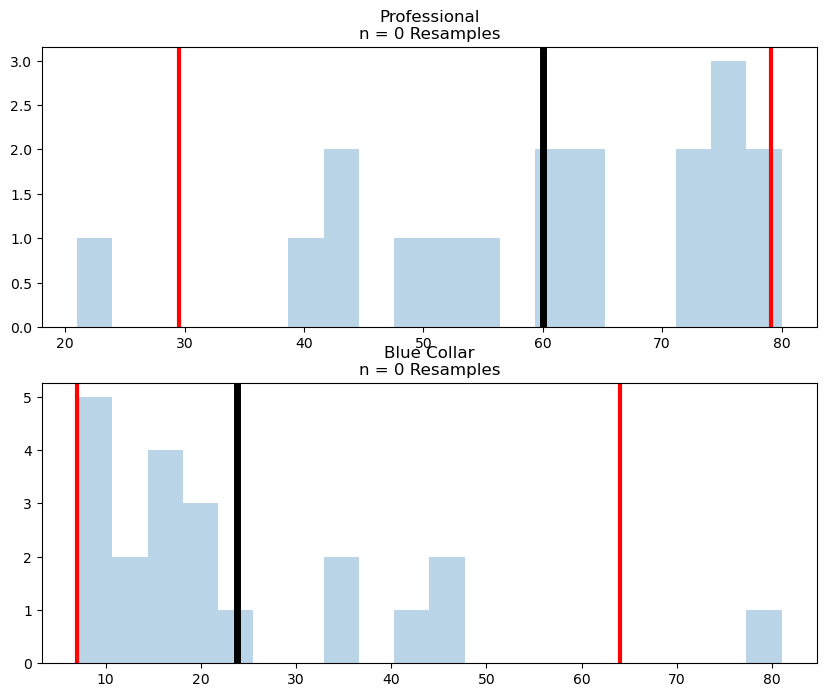

In [9]:
n_replicas=0
plot_distributions(n_replicas=n_replicas,
professional_sample=df_professional['income'],
    blue_collar_sample=df_blue_collar['income'],
    professional_label="Professional",
    blue_collar_label="Blue Collar")